In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, GRU, BatchNormalization

import nltk
nltk.download('stopwords')

2024-03-06 19:47:39.654699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 19:47:39.654977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 19:47:39.761747: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 19:47:39.918039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 19:47:42.429103: W tensorflow/compiler/tf2

True

In [2]:
data = pd.read_csv('metamap_data.csv')
data.head()

,label,aapp,acab,acty,aggp,amas,amph,anab,anim,anst,...,shro,socb,sosy,spco,tisu,tmco,topp,virs,vita,vtbt
0,Fake,1,0,3,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,Fake,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Fake,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,Fake,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,Fake,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Convert labels to lowercase
data['label'] = data['label'].str.lower()

# Drop rows with missing label values
data.dropna(subset=['label'], inplace=True)

In [4]:
# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [5]:
# Split data into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:

# Reshape input data to be 3-dimensional
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


In [8]:
# Define the model architecture
model = Sequential([
    GRU(units=100,return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.5),
    BatchNormalization(),
    GRU(units=50),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 100)            68700     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 


 batch_normalization (Batch  (None, 1, 100)            400       
 Normalization)                                                  
                                                                 
 gru_1 (GRU)                 (None, 50)                22800     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 92421 (361.02 KB)
Trainable params: 92221 (360.24 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [10]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
26/26 [==============================] - 4s 37ms/step - loss: 0.6676 - accuracy: 0.5752 - val_loss: 0.6618 - val_accuracy: 0.6618
Epoch 2/50
26/26 [==============================] - 0s 11ms/step - loss: 0.6056 - accuracy: 0.6857 - val_loss: 0.6136 - val_accuracy: 0.6994
Epoch 3/50
26/26 [==============================] - 0s 10ms/step - loss: 0.5607 - accuracy: 0.7292 - val_loss: 0.5659 - val_accuracy: 0.7428
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4945 - accuracy: 0.7727 - val_loss: 0.5327 - val_accuracy: 0.7428
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4571 - accuracy: 0.7826 - val_loss: 0.5012 - val_accuracy: 0.7630
Epoch 6/50
26/26 [==============================] - 0s 9ms/step - loss: 0.4455 - accuracy: 0.7975 - val_loss: 0.5167 - val_accuracy: 0.7514
Epoch 7/50
26/26 [==============================] - 0s 10ms/step - loss: 0.4378 - accuracy: 0.7988 - val_loss: 0.4787 - val_accuracy: 0.7717
Epoch 8/50
26/2

In [11]:
# Predict probabilities
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to class predictions
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

11/11 [==============================] - 1s 3ms/step


Accuracy: 0.8063583815028902
Precision: 0.8203592814371258
Recall: 0.7873563218390804
F1 Score: 0.8035190615835777
AUC Score: 0.8064688585939588


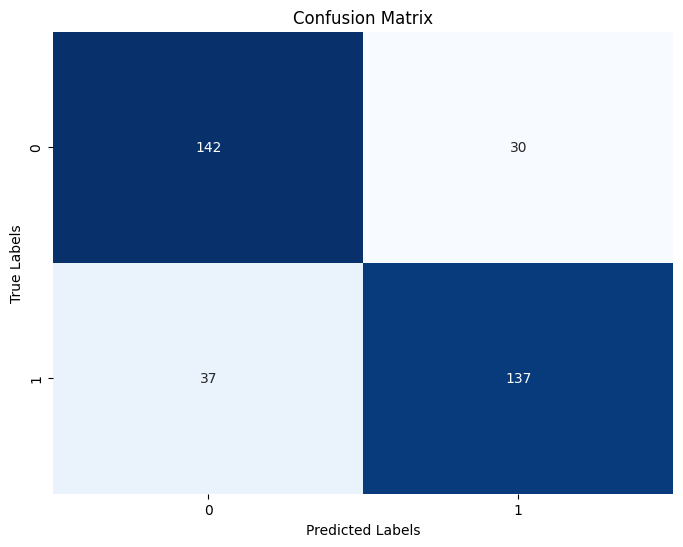

In [12]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


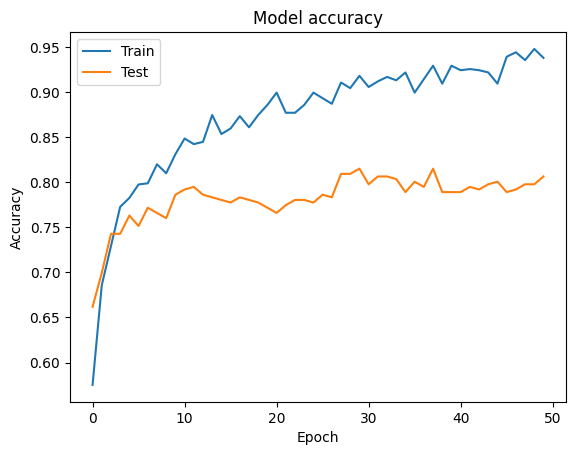

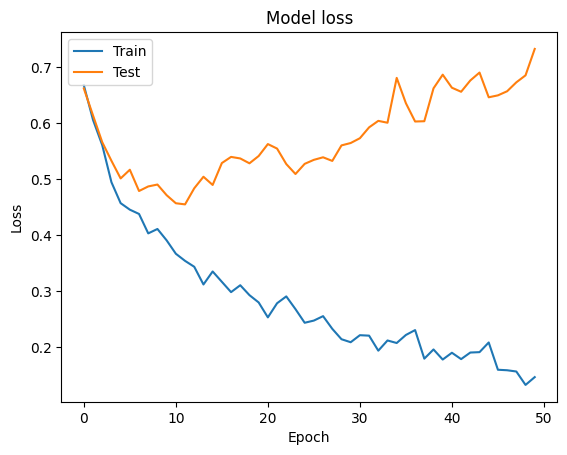

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()